# Exercise 6: SVM

In this exercise, we see Support Vector Machine (SVM) with various kernel functions.  

We use Scikit-learn, a Python package of machine learning methods. We are using a toy binary classification example to understand Linear SVM, and then see feature expansion and kernel functions to extend it to non-linearly separable data.

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plots import plot, plot_expand, plot_simple_data
from helpers import get_circle_dataset, get_simple_dataset
%load_ext autoreload
%autoreload 2

# 1 Scikit-Learn

Training an SVM classifer is not a easy task, so in this session, we are going to use Scikit-Learn, which is a machine learning library for Python. Most of the machine learning algorithms and tools are already implemented. In this exercise, we'll use this package to train and understand SVM. If you are interested in how to optimize a SVM, you can refer to [this](https://xavierbourretsicotte.github.io/SVM_implementation.html).

This package `sklearn` should already be implemented in your conda enviornment. If it's not the case, type the following command in your terminal:
```
conda install -y -c conda-forge sklearn
```

Scikit-Learn has modules implemented broadly for 
- Data Transformations: https://scikit-learn.org/stable/data_transforms.html
- Model Selection and Training: https://scikit-learn.org/stable/model_selection.html
- Supervised Techniques: https://scikit-learn.org/stable/supervised_learning.html
- Unsupervised Techniques: https://scikit-learn.org/stable/unsupervised_learning.html

All the magic happens under the hood, but gives you freedom to try out more complicated stuff.  
Different methods to be noted here are
- `fit`: Train a model with the data
- `predict`: Use the model to predict on test data
- `score`: Return mean accuracy on the given test data

Have a look at [this](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) for a simple example.

We will explore SVM for classification in this session: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). We will start here with the linear kernel.

In [2]:
# We import the SVM classifier class from scikit-learn.
from sklearn.svm import SVC

# 2 Linear SVM

SVM tries to solve linear classification problem of this form:

$$
\begin{align}
    \mathbf{w}^* = \underset{\mathbf{w},\{\xi_n\}}{\operatorname{argmin}}  \ \ & \frac{1}{2}\|\mathbf{w}\|^2 + C \sum^N_{n=1}\xi_n \\
    \operatorname{subject \  to} \ \ &  t_n\cdot(\tilde{\mathbf{w}}\cdot\mathbf{x_n}) \geq 1-\xi_n , \forall n \\
                        &\text{and  }\  \xi_n \geq 0 , \forall n
\end{align}
$$
where, $\tilde{\mathbf{w}}$ are the weights with bias term, $x_n$ is a data sample and $t_n$ is a label.

**Q.** Why do we minimize $\|\mathbf{w}\|$ ? 

**A.** This is a regularization to not overfit the model to the data. 

**Q.** What is C? How should we choose the best value for C?

**A.** It determines how much we should regularize. A high value of C means that we do not regularize very much and vise versa. We can test some C.s and use cross validation to ensure high accuracy and fairly close accuracy for both test and validation data.
    
**Q.** What does it mean when $\xi_i \gt 0$ ?

**A.** It relaxes the constraint so that we can have some wrongly classified samples.


## 2.1 Binary Classification

Let's begin with a simple **binary** classification using Linear SVM.
The data is simply **linearly** separable.

We visualize here the optimal maximum-margin solution without misclassifications.

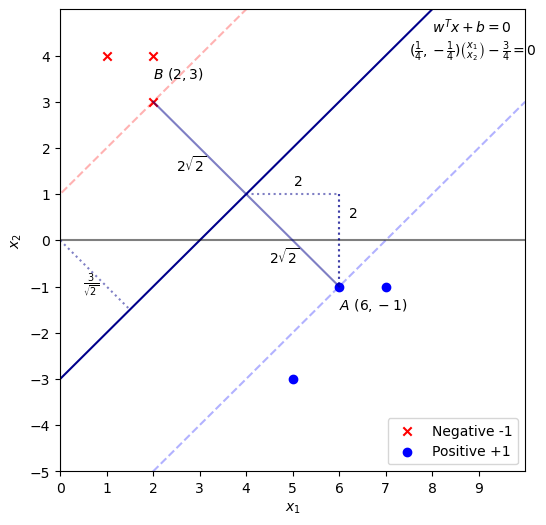

In [3]:
# Simple data with 3 points per class
X = np.array([[2,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
Y = np.array([-1, -1, -1, 1, 1, 1])
plot_simple_data()

In this part, you are asked to build a SVM classifier using SVC and to understand the outputs from the fitted model.

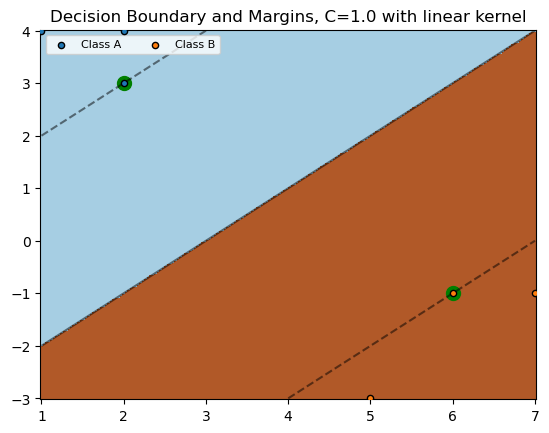

w =  [[ 0.25 -0.25]]
w0 =  [-0.75]
Number of support vectors for each class =  [1 1]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Indices of support vectors =  [2 3]


In [4]:
### WRITE YOUR CODE HERE
# 1. Declare a SVC with C=1.0 and kernel='linear'
clf = SVC(C=1.0, kernel='linear')

# 2. use X and Y to fit the model
clf.fit(X,Y)

# 3. We show the fitted model
plot(X, Y, clf)

# Some information we can extract from the model
# Take note of them as you might need them in the future!
print('w = ', clf.coef_)
print('w0 = ', clf.intercept_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Support vectors = ', clf.support_vectors_)
print('Indices of support vectors = ', clf.support_)

In this case, we found that we have 2 **support vectors**, one in each class. They are shown highlighed in green in the plot. A support vector is a data sample that is either on the margin or within the margin (or misclassified). 

Let's inspect the result of the classification. We do the classification in the following way:

$$ 
y_i = \begin{cases}
-1 & \text{if} \ \mathbf{x}_i^T \mathbf{w} + w_0 < 0\\
1 & \text{otherwise}
\end{cases}
$$

*Note*: when doing this on multiple data points at a time, $X$ is an $N\times D$ matrix.

In [39]:
# Use the weights (w) from the fitted model to predict the labels of input data points
def raw_predict(X, w, w0):
    '''
    Given input data X, SVM weight w and w0, output the prediction result.
    
    Args:
        X: data, array of shape (N, D) where N is the number of datapoints and D is the dimension of features.
        w: weights, array of shape (D,)
        w0: bias, array of shape (1,)
    Returns:
        out: predictions, array of shape (N,)
    '''
    ### WRITE YOUR CODE HERE

    out = np.sign((X @ w) + w0)

    out[out == 0] = 1

    return out.astype(int)

x_test = np.array([
    [4, 2],
    [ 6, -3]
])

### WRITE YOUR CODE HERE: Use your implementation to do the prediction on the test data.
raw_pred = raw_predict(x_test, clf.coef_[0], clf.intercept_)
print("Prediction from your implementation: ", raw_pred)

### WRITE YOUR CODE HERE: Use scikit-learn's predict function to do the prediction on the test data.
model_predict = clf.predict(x_test)

print("Prediction from the model: ", model_predict)

assert np.isclose(raw_pred, model_predict).all(), "Your implementation is not correct."


Prediction from your implementation:  [-1  1]
Prediction from the model:  [-1  1]


Now, let us determine the indices of the support vectors. (Reminder: These are the data samples that fall on the margin or within the margin). 

In [47]:
## We can also calculate the decision function manually.

## Step 1
### WRITE YOUR CODE HERE: Code the decision function: Xw + w_0
decision_function = (X @ clf.coef_[0]) + clf.intercept_

## Step 2: We can also retrieve the decision function from the model:
decision_function_from_model = clf.decision_function(X)

assert np.isclose(decision_function, decision_function_from_model).all(), "Your implementation is not correct."

# What condition do the support vectors satisfy? 
# Remember that the support vectors are the points that on to the decision boundary, or within the margin.
### WRITE YOUR CODE HERE, hint: look into np.nonzero
support_vector_indices = np.nonzero(abs(decision_function) <= 1)

print('I find the indices of support vectors = ', support_vector_indices)
assert np.isclose(support_vector_indices, clf.support_).all(), "Your implementation is not correct."

I find the indices of support vectors =  (array([2, 3], dtype=int64),)


## 2.2 Different C values

Let's explore the effect of $C$ on a different dataset.

**Q.** How do you expect the margin to vary with C? *Hint*: have a look at the optimization formulation above.

**A.** We relax the constraint and let more samples fall within the margin.

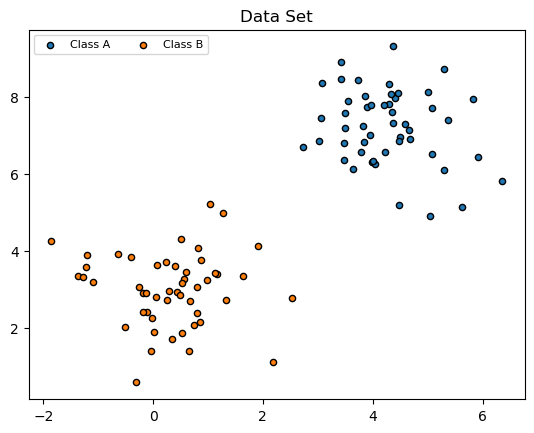

In [48]:
# Get the simple dataset
X, Y = get_simple_dataset()
plot(X, Y, None, dataOnly=True)

In the code below, vary the C value from 0.001 to 10 and pay attention to the changes.

The plot shows the decision boundary and margins of the learnt model. Encircled points are the support vectors.  
WARNING: if the margins go beyond the limits of the axis, they might not be shown.

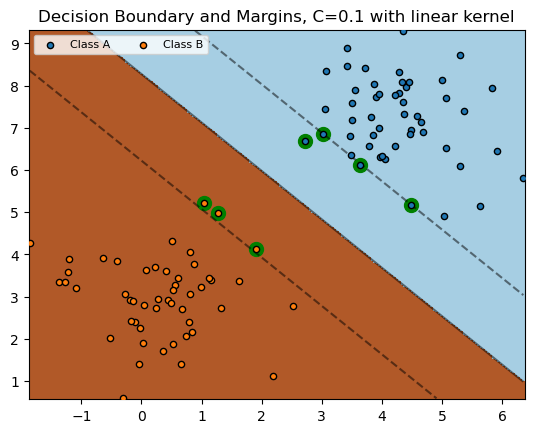

In [56]:
# Declare a SVM model with linear kernel and PLAY WITH THE VALUE OF C
C_svm = 0.1
clf = SVC(C = C_svm, kernel= 'linear')

# Call the fit method
clf.fit(X, Y)

# Plot the decision boundary
plot(X, Y, clf)


### Additional Reading (if interested)
- Multiclass SVM (Bishop- Multiclass SVMs 7.1.3)
- Can we have probabilistic interpretation of SVM? (Bishop- Relevance Support Machine 7.2)

# 3 Kernel SVM

Beyond the linear problem we discussed before, SVM can also solve non-linear classification problem by doing some feature expansion on the input data. 

We replace $\mathbf{x}_i$ with $\phi(\mathbf{x}_i)$, and then $\mathbf{x}_i^\top\mathbf{x}_j$ with $\phi(\mathbf{x}_i)^\top\phi(\mathbf{x}_j)=k(\mathbf{x}_i,\mathbf{x}_j)$. 

$\phi(\cdot)$ is the (possibly unknown) feature expansion function, and $k(\cdot)$ is the kernel function.

The **dual form** of this problem is given by:

$$
\begin{align}
    \underset{\{\lambda_i\}}{\operatorname{max}} \ \ 
    & \sum_{n=1}^N \lambda_i - \frac 1 2 \sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_jt_it_jk(\mathbf{x}_i,\mathbf{x}_j)  \\   
    \operatorname{subject \ to} & \ \ \sum_{i=1}^N \lambda_it_i = 0 \\
                 & \ \ 0 \leq \lambda_i \leq C, \forall i \ \ 
\end{align}
$$

**Q.** 
1. How can you write $\mathbf{w}$ using $\lambda_i$ and function $\phi$?
2. How is $y(\mathbf{x})$ represented using $\lambda_i$?
 
**A.**
1. $w = \sum_{n = 1}^N \lambda_n t_n \phi(x)$

2. $y = \sum_{n = 1}^N \lambda_n t_n k(x, x_n) + b$

We continue with the Scikit-Learn implementation of [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). The main parameters you should look for are:
- Kernel Functions: `kernel`. Linear, Polynomial and RBF ($X$ is the data)
    - Linear: `linear`. $\langle X, X' \rangle $.
    - Polynomial: `poly`. $( \gamma \langle X, X' \rangle + r)^d $. $d$ is specified by keyword `degree`, $r$ by `coef0`.
    - RBF: `rbf`. $\exp(-\gamma ||X - X'||^2)$. $\gamma$ is specified by keyword `gamma`, must be greater than 0.
- Penalty term, `C`: for all
- `gamma`: for Polynomial and RBF kernel (mostly RBF)
- `degree`: for Polynomial kernel


## 3.1 Non-linearly separable data

We use a binary dataset that cannot be separated linearly in the original feature space.

Then, we'll try the different kernel and explore how their parameters affect the results.

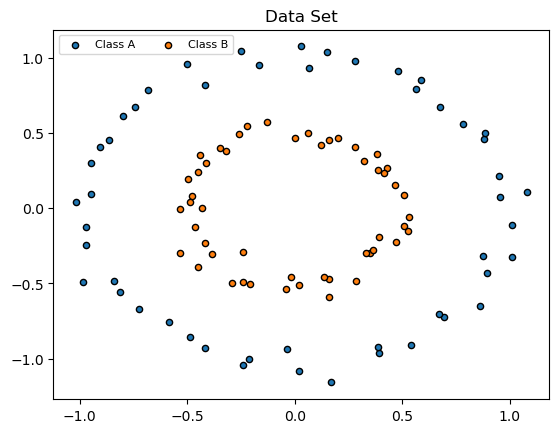

In [57]:
# Load data
X, Y = get_circle_dataset()
plot(X, Y, None, dataOnly=True)

## 3.2 Linear SVM

As you should expect, linear SVM does not perform well in this case.

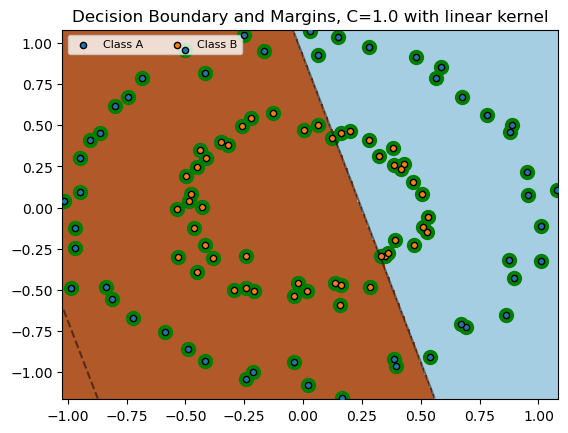

In [58]:
# Use SVM with linear kernel
clf_linear = SVC(kernel='linear', C=1.0)
    
clf_linear.fit(X, Y)
plot(X, Y, clf_linear)

## 3.3 Polynomial SVM

For polynomial SVM, we have two options:
1. We can explicitely write a polynomial feature expansion $\phi_\text{poly}(\cdot)$ to edit the data $X$, then use linear SVM on it.
2. We use the kernel trick to only define a kernel function $k_\text{poly}(\cdot,\cdot)$, which is directly used in SVM.

Let's do both and compare the results!

Fill in the function `expand_X()` that performs polynomial feature expansion. 
You should add a bias term, but **omit the interaction terms**. An example:

For $D=2$ and $\text{degree}=3$, the data
$$
\mathbf{x}_i = \begin{bmatrix}\mathbf{x}_i^{(0)}& \mathbf{x}_i^{(1)}\end{bmatrix},
$$
after the polynomial feature expansion, will become
$$ 
\mathbf{\phi}(\mathbf{x}_i) = \begin{bmatrix}\mathbf{1} & \mathbf{x}_i^{(0)} & \mathbf{x}_i^{(1)} & (\mathbf{x}_i^{(0)})^2 & (\mathbf{x}_i^{(1)})^2 & (\mathbf{x}_i^{(0)})^3 & (\mathbf{x}_i^{(1)})^3 \end{bmatrix}.
$$

In [104]:
# Perform degree-d polynomial feature expansion of input data X
def expand_X(X, degree):
    """
    Polynomial feature expansion with bias but omitting interaction terms
    
    Args:
        X (array): data, shape (N, D).
        degree (int): The degree of the polynomial feature expansion.
    Returns:
        expanded_X (array): Expanded data with shape (N, new_D), 
                               where new_D = D * degree + 1
    """
    ### WRITE YOUR CODE HERE
    N = X.shape[0]
    D = X.shape[1]

    expanded_X =  np.zeros((N, (degree*D + 1)))

    expanded_X[:,0] = 1

    for deg in range(degree):
        expanded_X[:,2*deg + 1:2*deg + 1 + D] = X**(deg+1)
    
    return expanded_X

The original data has 2 features.
After degree-2 polynomial feature expansion (with bias, without interaction terms) the data has 5 features.


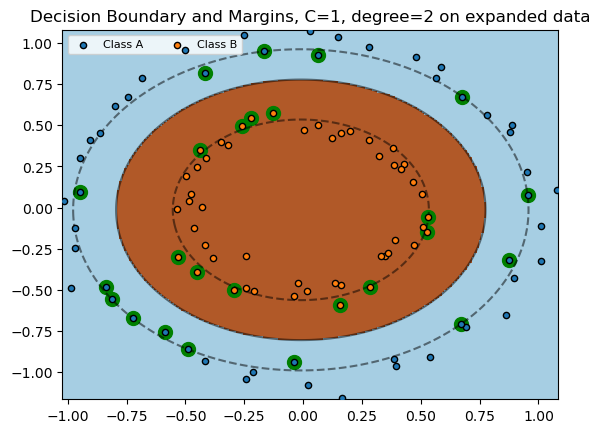

In [118]:
# Polynomial SVM
degree = 2 # you can play with the degree. How does the decision boundary change?

## Do polynomial feature expansion
### WRITE YOUR CODE HERE
expanded_X = expand_X(X, degree)

print("The original data has {} features.".format(X.shape[1]))
print("After degree-{} polynomial feature expansion (with bias, without interaction terms) the data has {} features.".format(degree,expanded_X.shape[1]))

## Use SVM with linear kernel on expanded data
### WRITE YOUR CODE HERE: you can play with C
C_svm = 1
expanded_clf = SVC(C = C_svm, kernel='linear')
expanded_clf.fit(expanded_X,Y)

plot_expand(X, Y, expanded_clf, degree=degree)

The non-linearly separable dataset can now be classified correctly by a linear SVM, thanks to the polynomial feature expansion.

Let's now directly use the polynomial kernel function in SVM.

Given data $\mathbf{X}$ with $N$ samples, its kernel matrix $\mathbf{K}$ is the $N \times N$ symmetric Gram matrix with elelments 

$$ \mathbf{K}_{n,m} = \phi(\mathbf{x}_n)^T\phi(\mathbf{x}_m) = k(\mathbf{x}_n, \mathbf{x}_m) $$

The polynomial kernel is SVM is written as:
- poly: $( \gamma \langle \mathbf{X}, \mathbf{X'} \rangle + r)^d $. $d$ is specified by keyword `degree`, $r$ by `coef0`,
   
where $X$ is the data.

Note that $\phi$ **does not appear explicitly** in the kernel functions!

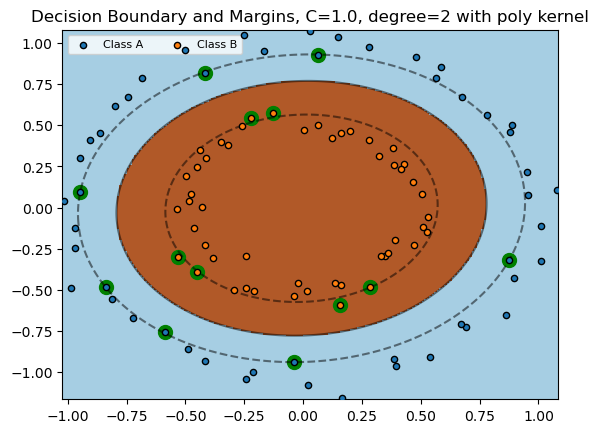

In [126]:
# Use SVM with poly kernel
### WRITE YOUR CODE HERE and PLAY with C, degree and coef0 parameters
C_svm = 1.0
degree_svm = 2
coef0_svm = 1
clf_poly = SVC(C = C_svm, kernel= 'poly', degree=degree_svm, coef0=coef0_svm)
    
clf_poly.fit(X, Y)
plot(X, Y, clf_poly)

**Q.** 
1. What are the differences between polynomial feature expansion and polynomial kernel function? 

2. Is the SVM trained with linear kernel on polynomially expanded data same as the SVM trained with polynomial kernel function on original data?

**A.** 
1. The kernel function does not actually need to compute the polynomial feature expansion. We directly compute the kernel function and reduce the computational cost.

2. Yes.


## 3.4 RBF SVM

Finally, let's try the Radial Basis Function (RBF) kernel:
* `rbf`: $\exp(-\gamma ||X - X'||^2)$. $\gamma$ is specified by keyword `gamma`, and must be greater than 0.

$\gamma$ is a form of scaling factor for the distance between points. If it is increased, then the exponential decays faster with distance, and vice-versa. 

Try different values of $\gamma$ below, e.g., in the range $[0.01, 100]$, and see how the decision function is affected.

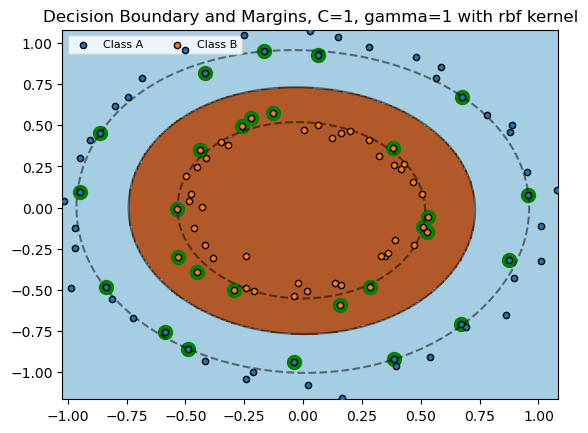

In [137]:
# Use SVM with rbf kernel
### WRITE YOUR CODE HERE and PLAY with C and gamma parameters
C_svm = 1
gamma_svm = 1
clf_rbf = SVC(C = C_svm, kernel='rbf', gamma= gamma_svm)
    
clf_rbf.fit(X, Y)
plot(X, Y, clf_rbf)

### Choosing a kernel

We have seen how to use SVM for classification as a linear classifier, and then how to extend it to non-linearly separable data through the use of kernel functions.

But in practice, **how does one choose which kernel to use and its hyperparameters?**

You guessed it $\rightarrow$ by using a validation set! 

While in this exercise we have only tested SVM on the training data to visualize the effect of the different hyperparameters and kernels, on real problems we would also use validation data to evaluate the performance of the classifier.

# 4 Written questions

## 4.1 Find the Margins

We learn a hard-margin (i.e., *no misclassification allowed*) linear SVM classifier for the data samples shown in the figure below.

<img src="img/svm_q1.png" width="400">

Answer the following questions:

1. What do you expect the decision boundary to be? What is its equation in terms of $x_1$ and $x_2$?

2. How many support vectors are there? Write down their coordinates.

3. What are the weights (including the bias term) for the SVM formulation? *Hint*: use the decision boundary found above and that the support vectors should lie exactly on the margin.

4. If we learn a **soft-margin** (with slack variables) linear SVM classifier, then what can be the maximum and the minimum number of support vectors, assuming we play with the penatly term $C$?

**Answers.**
1. Diagonal line equal length to the closest samples. $x_2 - x_1 = 0$ 
2. 2, (2,4) and (4,2)
3. w0 = 0, w1 = -1/2, w2 = 1/2
4. 4.

**Q.2** (MCQ) Recall that the SVM formulation is written as

$$
\begin{align}
    \underset{\mathbf{w},\{\xi_n\}}{\operatorname{min}}  \ \ & \frac{1}{2}\|\mathbf{w}\|^2 + C \sum^N_{n=1}\xi_n \\
    \operatorname{subject \  to} \ \ &  t_n\cdot(\mathbf{w}\cdot\mathbf{x_n} + w^{(0)}) \geq 1-\xi_n , \forall n \\
                        &\text{and  }\  \xi_n \geq 0 , \forall n
\end{align}
$$

where $C$ is a constant, $\xi_{n}$ are the slack variables, $\mathbf{x}_n$ is a data sample, $t_n$ is a target label in $\{-1,1\}$, $w^{(0)}$ is the bias term, and $\mathbf{w}$ are the parameters of the model (without the bias). 

Which of the following statements regarding this formulation is/are correct?
1. Minimizing $\frac{1}{2}\|\mathbf{w}\|^2$ allows us to *minimize* the margin between the decision boundary and the data points.
2. There are as many slack variables $\xi_n$ as there are support vectors.
3. While training the SVM, we are optimizing for the bias $w^{(0)}$, the model parameters $\mathbf{w}$, and the slack variables $\xi_n$.
4. If $C$ is $0$, the points cannot be misclassified.
5. The minimization of $C \sum_{n=1}^N \xi_{n}$ aims to *minimize* the number of points that are misclassified.

**A.2**
1. False, useless classifier.
2. False, every sample has one.
3. True
4. True
5. True